In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

Text(0, 0.5, 'package')

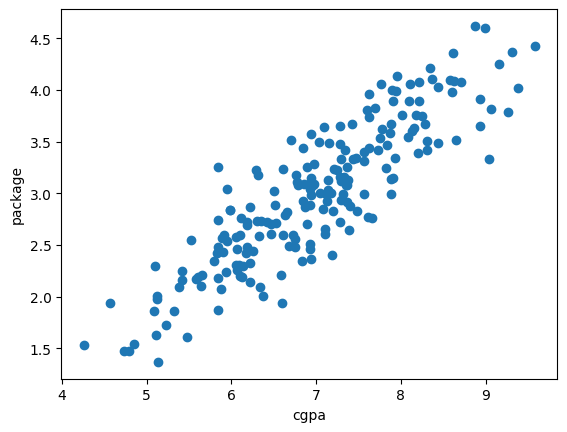

In [10]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("cgpa")
plt.ylabel("package")

#### distribute the column

In [11]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [13]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [14]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

### Train the model

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [27]:
x_train.head()

,cgpa
4,6.94
25,7.28
8,6.09
199,6.22
39,7.43


In [28]:
y_train.head()

4      3.57
25     3.65
8      2.31
199    2.33
39     3.33
Name: package, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

### plot the regression line

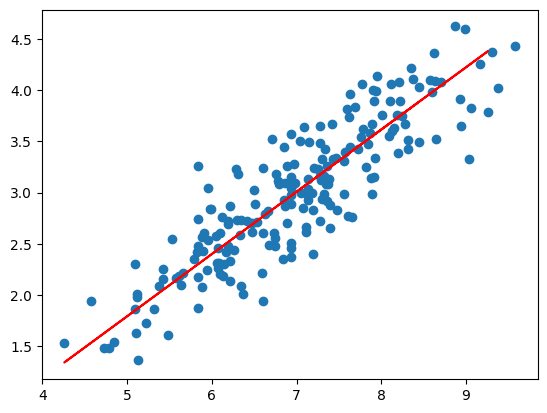

In [32]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_train,lr.predict(x_train),color="red")

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
y_pred=lr.predict(x_test)
y_pred

array([2.36845596, 3.12199959, 3.40761693, 3.69323427, 2.42922561,
       3.34684728, 2.38668686, 2.33199417, 2.97007547, 4.17939145,
       4.45285486, 2.70268902, 2.92145975, 4.57439415, 4.18546841,
       3.57169498, 4.41031611, 2.58722669, 3.54738712, 2.04637683,
       4.24623806, 3.07338387, 3.24353888, 2.53253401, 4.21585324,
       3.99100554, 2.76953563, 2.08283862, 3.80261964, 2.97007547,
       3.24961585, 2.90930582, 4.25839199, 2.91538279, 1.86406789,
       3.74184999, 2.47784133, 2.36845596, 2.68445813, 3.48054051,
       2.95792154, 3.03084512, 1.86406789, 2.98830636, 3.78438874,
       3.2921546 , 1.845837  , 3.11592262, 3.1888462 , 2.30160935])

In [37]:
y_test.values

array([3.04, 2.4 , 2.76, 3.6 , 2.58, 3.31, 2.84, 2.57, 3.15, 3.91, 4.02,
       3.02, 3.09, 4.43, 3.65, 3.34, 4.37, 3.18, 3.67, 2.25, 3.33, 2.61,
       2.65, 2.87, 4.6 , 4.36, 2.6 , 1.61, 3.42, 2.98, 2.88, 2.35, 3.82,
       3.44, 2.01, 4.08, 2.19, 2.54, 2.61, 3.62, 3.09, 3.5 , 1.98, 3.28,
       3.67, 3.34, 1.86, 3.  , 3.33, 2.74])

In [38]:
print("mean squared error is:",mean_squared_error(y_test,y_pred))

mean squared error is: 0.1369727801787014


In [39]:
print("mean absolute error is",mean_absolute_error(y_test,y_pred))

mean absolute error is 0.305619325605732


In [40]:
print("root mean squared error is:",np.sqrt(mean_squared_error(y_test,y_pred)))

root mean squared error is: 0.3700983385246432


In [44]:
r2=r2_score(y_test,y_pred)
print("r2 score is",r2)

r2 score is 0.7073427298147257


In [45]:
# adjusted r2 score
x_test.shape

(50, 1)

In [46]:
1-((1-r2)*len(x_test-1)/(len(x_test)-1-1))

0.6951486768903392

In [52]:
# create a new dataframe and add a column random
newdf=df.copy()
newdf["random_feature"]=np.random.random(200)
newdf=newdf[["cgpa","random_feature","package"]]
newdf.head()

,cgpa,random_feature,package
0,6.89,0.342108,3.26
1,5.12,0.667170,1.98
2,7.82,0.289668,3.25
3,7.42,0.205727,3.67
4,6.94,0.486536,3.57


Text(0, 0.5, 'package')

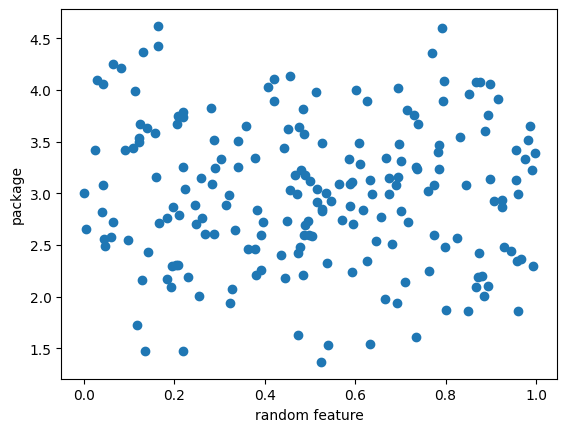

In [54]:
plt.scatter(newdf["random_feature"],newdf["package"])
plt.xlabel("random feature")
plt.ylabel("package")

In [56]:
X=newdf.iloc[:,0:2]
Y=newdf.iloc[:,-1]

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2)

In [58]:
X_train.head()

,cgpa,random_feature
159,8.71,0.867759
100,7.95,0.457052
11,6.61,0.487980
187,6.26,0.944439
24,6.53,0.167136


In [59]:
X_test.head()

,cgpa,random_feature
112,8.58,0.029124
29,7.15,0.526199
182,5.88,0.326887
199,6.22,0.537647
193,4.57,0.692281


In [60]:
Lr=LinearRegression()

In [61]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [63]:
Y_pred=Lr.predict(X_test)
Y_pred

array([3.90653572, 3.09602702, 2.37671239, 2.56916008, 1.63428971,
       1.75929671, 2.05904962, 2.93168879, 3.77619461, 2.93708717,
       4.11021953, 3.52085289, 2.97161558, 2.39365702, 3.1923776 ,
       3.47577873, 1.92866464, 3.24923972, 2.97670915, 3.42494931,
       2.55221222, 3.1693095 , 2.85811371, 3.12421419, 3.69625449,
       2.86980243, 3.50420879, 3.35080915, 3.93425361, 1.94571928,
       3.66284637, 3.21500384, 3.75332959, 2.78460582, 2.77889454,
       3.27742835, 3.53779538, 2.60845725, 2.65436166, 2.71100275,
       3.09002187, 4.10411308, 2.11576979, 1.9349365 , 3.44764858,
       2.87511551, 2.9486794 , 2.83014535, 3.52646015, 3.51490248])

In [65]:
# calculate r2 score
r2=r2_score(Y_test,Y_pred)
print("r2 score is",r2)

r2 score is 0.7626575867692261


In [82]:
# adjusted r2 score
1-(1-r2)*(len(X_test)-1)/(len(X_test)-1-2)

0.7856535537253762

### another test case

In [69]:
newdf2=df.copy()
newdf2["iq"]=newdf["package"]+np.random.randint(-12,12,200)/10
newdf2=newdf2[["cgpa","iq","package"]]
newdf2.head()

,cgpa,iq,package
0,6.89,3.66,3.26
1,5.12,1.18,1.98
2,7.82,3.05,3.25
3,7.42,3.87,3.67
4,6.94,3.27,3.57


Text(0, 0.5, 'package in LPA')

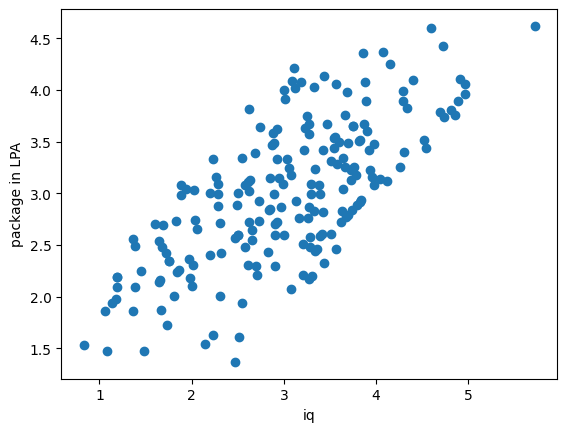

In [71]:
plt.scatter(newdf2["iq"],newdf2["package"])
plt.xlabel("iq")
plt.ylabel("package in LPA")

In [73]:
x=newdf2.iloc[:,0:2]
y=newdf2.iloc[:,-1]

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [77]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred=lr.predict(x_test)
y_pred

array([3.99088496, 3.04548879, 2.52669597, 2.74958517, 1.54397685,
       1.62817059, 1.85709892, 2.79220554, 3.61940602, 2.9390951 ,
       4.01302539, 3.39842455, 3.13731346, 2.52312774, 2.99453545,
       3.37371402, 1.81879768, 3.36960246, 2.76033872, 3.51643252,
       2.70495788, 3.2828783 , 2.77902994, 3.222545  , 3.57249555,
       2.54894477, 3.36008363, 3.64574802, 3.73837245, 2.03106155,
       3.55658198, 3.33273432, 3.74849412, 2.73023158, 2.86622874,
       3.34339933, 3.31522895, 2.88514737, 2.47609824, 2.85535616])

In [81]:
r2=r2_score(y_test,y_pred)
print("r2 score is",r2)

r2 score is 0.7944023882671976


In [85]:
# adjusted r2 score is
1-((1-r2)*(len(x_test)-1)/(len(x_test)-1-2))

0.7832890038492082